In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

survey1 = pd.read_csv("/Users/yuuki/survey1.csv")

In [2]:
print(survey1.columns)

Index(['SEX', 'AGE', 'GEN', 'PRE', 'ARE', 'JOB', 'MAR', 'CHI', 'q1s1', 'q1s2',
       ...
       'q7s6', 'q7s7', 'q7s8', 'q7s9', 'q8c1', 'q8c2', 'q8c3', 'q8c4', 'q8c5',
       'q8c6'],
      dtype='object', length=110)


In [3]:
col = survey1.columns[8:]
print(col)

Index(['q1s1', 'q1s2', 'q1s3', 'q1s4', 'q1s5', 'q1s6', 'q1s7', 'q1s8', 'q1s9',
       'q1s10',
       ...
       'q7s6', 'q7s7', 'q7s8', 'q7s9', 'q8c1', 'q8c2', 'q8c3', 'q8c4', 'q8c5',
       'q8c6'],
      dtype='object', length=102)


In [4]:
cols = ['SEX']

In [5]:
cols.extend(col)

In [6]:
print(cols)

['SEX', 'q1s1', 'q1s2', 'q1s3', 'q1s4', 'q1s5', 'q1s6', 'q1s7', 'q1s8', 'q1s9', 'q1s10', 'q1s11', 'q1s12', 'q2s1c1', 'q2s1c2', 'q2s1c3', 'q2s1c4', 'q2s1c5', 'q2s2c1', 'q2s2c2', 'q2s2c3', 'q2s2c4', 'q2s2c5', 'q2s3c1', 'q2s3c2', 'q2s3c3', 'q2s3c4', 'q2s3c5', 'q2s4c1', 'q2s4c2', 'q2s4c3', 'q2s4c4', 'q2s4c5', 'q2s5c1', 'q2s5c2', 'q2s5c3', 'q2s5c4', 'q2s5c5', 'q2s6c1', 'q2s6c2', 'q2s6c3', 'q2s6c4', 'q2s6c5', 'q2s7c1', 'q2s7c2', 'q2s7c3', 'q2s7c4', 'q2s7c5', 'q2s8c1', 'q2s8c2', 'q2s8c3', 'q2s8c4', 'q2s8c5', 'q2s9c1', 'q2s9c2', 'q2s9c3', 'q2s9c4', 'q2s9c5', 'q2s10c1', 'q2s10c2', 'q2s10c3', 'q2s10c4', 'q2s10c5', 'q2s11c1', 'q2s11c2', 'q2s11c3', 'q2s11c4', 'q2s11c5', 'q2s12c1', 'q2s12c2', 'q2s12c3', 'q2s12c4', 'q2s12c5', 'q2s13c1', 'q2s13c2', 'q2s13c3', 'q2s13c4', 'q2s13c5', 'q3', 'q4', 'q5', 'q6s1', 'q6s2', 'q6s3', 'q6s4', 'q6s5', 'q6s6', 'q6s7', 'q7s1', 'q7s2', 'q7s3', 'q7s4', 'q7s5', 'q7s6', 'q7s7', 'q7s8', 'q7s9', 'q8c1', 'q8c2', 'q8c3', 'q8c4', 'q8c5', 'q8c6']


In [7]:
# k-means

# お試し
# クラスタリングする列を指定
survey1_clustering = survey1[cols]

sc = StandardScaler()
survey1_clustering_sc = sc.fit_transform(survey1_clustering)

kmeans = KMeans(n_clusters=4, random_state=0)

clusters = kmeans.fit(survey1_clustering_sc)

survey1_clustering["cluster"] = clusters.labels_

print(survey1_clustering["cluster"].unique())

survey1_clustering.head()

[2 0 3 1]


/Users/yuuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SEX,q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,q1s8,q1s9,...,q7s7,q7s8,q7s9,q8c1,q8c2,q8c3,q8c4,q8c5,q8c6,cluster
0,1,4,4,4,4,4,2,4,4,4,...,1,2,1,0,0,1,0,0,0,2
1,1,3,4,3,4,4,4,4,4,4,...,5,5,5,1,0,0,0,0,0,0
2,2,4,4,4,4,4,3,4,4,4,...,3,3,2,1,0,0,0,0,0,3
3,2,4,4,4,3,4,4,4,4,4,...,5,4,4,1,0,0,0,0,0,0
4,2,4,4,3,4,4,4,4,4,4,...,1,1,1,0,0,1,0,0,0,3


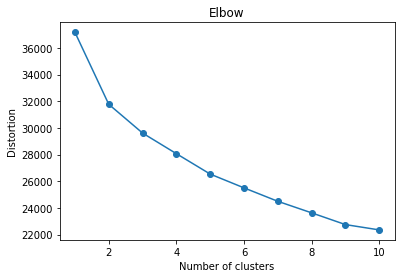

In [8]:
# エルボー法でベストなクラスター数を計算
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                random_state=0)
    km.fit(survey1_clustering_sc)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Elbow")
plt.show()

In [25]:
best_clusters = 0
for i in range(1, 10):
    if (distortions[i-1] - distortions[i] < 100):
        best_clusters = i
        break

print("ベストクラスタ数 ", best_clusters)


ベストクラスタ数  0


In [19]:
print(distortions)

[37183.0, 31777.113655519293, 29616.713079300065, 28069.349035927902, 26537.272899712385, 25502.7773866731, 24493.217212219286, 23626.639878295413, 22745.824681194623, 22346.6159589556]


In [20]:
len(distortions)

10

ベストなクラスター数は、2または9

In [26]:
# クラスター数を2に設定
survey1_clustering = survey1[cols]

sc = StandardScaler()
survey1_clustering_sc = sc.fit_transform(survey1_clustering)

kmeans = KMeans(n_clusters=2, random_state=0)

clusters = kmeans.fit(survey1_clustering_sc)

survey1_clustering["cluster"] = clusters.labels_

print(survey1_clustering["cluster"].unique())

survey1_clustering.head()

[0 1]


/Users/yuuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,SEX,q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,q1s8,q1s9,...,q7s7,q7s8,q7s9,q8c1,q8c2,q8c3,q8c4,q8c5,q8c6,cluster
0,1,4,4,4,4,4,2,4,4,4,...,1,2,1,0,0,1,0,0,0,0
1,1,3,4,3,4,4,4,4,4,4,...,5,5,5,1,0,0,0,0,0,1
2,2,4,4,4,4,4,3,4,4,4,...,3,3,2,1,0,0,0,0,0,1
3,2,4,4,4,3,4,4,4,4,4,...,5,4,4,1,0,0,0,0,0,1
4,2,4,4,3,4,4,4,4,4,4,...,1,1,1,0,0,1,0,0,0,1


In [28]:
# クラスターごとに分ける

cluster0 = survey1_clustering[survey1_clustering["cluster"]==0]
cluster0 = cluster0.reset_index(drop=True)
cluster1 = survey1_clustering[survey1_clustering["cluster"]==1]
cluster1 = cluster1.reset_index(drop=True)

In [29]:
cluster0["SEX"].mean()

1.3404255319148937

In [30]:
len(cluster0)

47

In [31]:
len(cluster1)

314

In [32]:
print(len(cluster0[cluster0["SEX"]==1]))

31


In [33]:
print(len(cluster0[cluster0["SEX"]==2]))

16


In [34]:
print(len(cluster1[cluster1["SEX"]==1]))

149


In [35]:
print(len(cluster1[cluster1["SEX"]==2]))

165


In [37]:
q1_cols = ['q1s1', 'q1s2', 'q1s3', 'q1s4', 'q1s5', 'q1s6', 'q1s7', 'q1s8', 'q1s9', 'q1s10', 'q1s11', 'q1s12']

cluster0.loc[:, q1_cols].mean()

q1s1     3.382979
q1s2     3.744681
q1s3     3.617021
q1s4     3.659574
q1s5     3.680851
q1s6     3.340426
q1s7     3.659574
q1s8     3.744681
q1s9     3.808511
q1s10    3.765957
q1s11    3.851064
q1s12    3.936170
dtype: float64

In [38]:
cluster1.loc[:, q1_cols].mean()

q1s1     3.828025
q1s2     3.974522
q1s3     3.904459
q1s4     3.952229
q1s5     3.869427
q1s6     3.773885
q1s7     3.878981
q1s8     3.993631
q1s9     3.958599
q1s10    3.901274
q1s11    3.968153
q1s12    3.977707
dtype: float64

In [39]:
q1_cnt = [[0,0,0,0] for _ in range(12)]

for i in range(12):
    for j in range(len(cluster0)):
        tmp = cluster0[q1_cols[i]][j]
        tmp -= 1
        q1_cnt[i][tmp] += 1
print(q1_cnt)

[[3, 2, 16, 26], [2, 0, 6, 39], [1, 3, 9, 34], [1, 1, 11, 34], [1, 2, 8, 36], [2, 6, 13, 26], [1, 1, 11, 34], [2, 1, 4, 40], [1, 2, 2, 42], [1, 1, 6, 39], [1, 0, 4, 42], [1, 0, 0, 46]]


In [42]:
size = [47,47,47,47]
size = np.array(size)
hund = [100,100,100,100]
hund = np.array(hund)

In [46]:
for i in range(12):
    tmp = q1_cnt[i]
    tmp = np.array(tmp)
    print(q1_cols[i], tmp/size*hund)

q1s1 [ 6.38297872  4.25531915 34.04255319 55.31914894]
q1s2 [ 4.25531915  0.         12.76595745 82.9787234 ]
q1s3 [ 2.12765957  6.38297872 19.14893617 72.34042553]
q1s4 [ 2.12765957  2.12765957 23.40425532 72.34042553]
q1s5 [ 2.12765957  4.25531915 17.0212766  76.59574468]
q1s6 [ 4.25531915 12.76595745 27.65957447 55.31914894]
q1s7 [ 2.12765957  2.12765957 23.40425532 72.34042553]
q1s8 [ 4.25531915  2.12765957  8.5106383  85.10638298]
q1s9 [ 2.12765957  4.25531915  4.25531915 89.36170213]
q1s10 [ 2.12765957  2.12765957 12.76595745 82.9787234 ]
q1s11 [ 2.12765957  0.          8.5106383  89.36170213]
q1s12 [ 2.12765957  0.          0.         97.87234043]


In [47]:
q1_cnt = [[0,0,0,0] for _ in range(12)]

for i in range(12):
    for j in range(len(cluster1)):
        tmp = cluster1[q1_cols[i]][j]
        tmp -= 1
        q1_cnt[i][tmp] += 1
print(q1_cnt)

[[2, 3, 42, 267], [0, 0, 8, 306], [1, 1, 25, 287], [1, 0, 12, 301], [0, 3, 35, 276], [5, 5, 46, 258], [0, 1, 36, 277], [0, 0, 2, 312], [0, 1, 11, 302], [1, 2, 24, 287], [0, 2, 6, 306], [0, 0, 7, 307]]


In [48]:
size = [314,314,314,314]
size = np.array(size)
hund = [100,100,100,100]
hund = np.array(hund)
for i in range(12):
    tmp = q1_cnt[i]
    tmp = np.array(tmp)
    print(q1_cols[i], tmp/size*hund)

q1s1 [ 0.63694268  0.95541401 13.37579618 85.03184713]
q1s2 [ 0.         0.         2.5477707 97.4522293]
q1s3 [ 0.31847134  0.31847134  7.96178344 91.40127389]
q1s4 [ 0.31847134  0.          3.82165605 95.85987261]
q1s5 [ 0.          0.95541401 11.14649682 87.89808917]
q1s6 [ 1.59235669  1.59235669 14.64968153 82.1656051 ]
q1s7 [ 0.          0.31847134 11.46496815 88.21656051]
q1s8 [ 0.          0.          0.63694268 99.36305732]
q1s9 [ 0.          0.31847134  3.50318471 96.17834395]
q1s10 [ 0.31847134  0.63694268  7.6433121  91.40127389]
q1s11 [ 0.          0.63694268  1.91082803 97.4522293 ]
q1s12 [ 0.          0.          2.22929936 97.77070064]


In [59]:
q1_cnt = [[0,0,0,0] for _ in range(12)]
c = []
for i in range(12):
    for j in range(len(cluster1)):
        tmp = cluster1[q1_cols[i]][j]
        tmp -= 1
        q1_cnt[i][tmp] += 1
print(q1_cnt)
size = [314,314,314,314]
size = np.array(size)
hund = [100,100,100,100]
hund = np.array(hund)
for i in range(12):
    tmp = q1_cnt[i]
    tmp = np.array(tmp)
    a = list(tmp/size*hund)
    c.append(a)

[[2, 3, 42, 267], [0, 0, 8, 306], [1, 1, 25, 287], [1, 0, 12, 301], [0, 3, 35, 276], [5, 5, 46, 258], [0, 1, 36, 277], [0, 0, 2, 312], [0, 1, 11, 302], [1, 2, 24, 287], [0, 2, 6, 306], [0, 0, 7, 307]]


In [60]:
index = ["gogaku","syumi","boki", "writing","ongaku","supo","bunka","igo","bijutu","ryouri","biyou","dansu"]
c = pd.DataFrame(c, columns = ["3~","2 izenn", "yatteta","yattakotonai"], index = index)

In [61]:
c

,3~,2 izenn,yatteta,yattakotonai
gogaku,0.636943,0.955414,13.375796,85.031847
syumi,0.000000,0.000000,2.547771,97.452229
boki,0.318471,0.318471,7.961783,91.401274
writing,0.318471,0.000000,3.821656,95.859873
ongaku,0.000000,0.955414,11.146497,87.898089
supo,1.592357,1.592357,14.649682,82.165605
bunka,0.000000,0.318471,11.464968,88.216561
igo,0.000000,0.000000,0.636943,99.363057
bijutu,0.000000,0.318471,3.503185,96.178344
ryouri,0.318471,0.636943,7.643312,91.401274


In [62]:
q1_cnt = [[0,0,0,0] for _ in range(12)]
c = []
for i in range(12):
    for j in range(len(cluster0)):
        tmp = cluster0[q1_cols[i]][j]
        tmp -= 1
        q1_cnt[i][tmp] += 1
print(q1_cnt)
size = [47,47,47,47]
size = np.array(size)
hund = [100,100,100,100]
hund = np.array(hund)
for i in range(12):
    tmp = q1_cnt[i]
    tmp = np.array(tmp)
    a = list(tmp/size*hund)
    c.append(a)

[[3, 2, 16, 26], [2, 0, 6, 39], [1, 3, 9, 34], [1, 1, 11, 34], [1, 2, 8, 36], [2, 6, 13, 26], [1, 1, 11, 34], [2, 1, 4, 40], [1, 2, 2, 42], [1, 1, 6, 39], [1, 0, 4, 42], [1, 0, 0, 46]]


In [63]:
index = ["gogaku","syumi","boki", "writing","ongaku","supo","bunka","igo","bijutu","ryouri","biyou","dansu"]
c = pd.DataFrame(c, columns = ["3~","2 izenn", "yatteta","yattakotonai"], index = index)
c

,3~,2 izenn,yatteta,yattakotonai
gogaku,6.382979,4.255319,34.042553,55.319149
syumi,4.255319,0.000000,12.765957,82.978723
boki,2.127660,6.382979,19.148936,72.340426
writing,2.127660,2.127660,23.404255,72.340426
ongaku,2.127660,4.255319,17.021277,76.595745
supo,4.255319,12.765957,27.659574,55.319149
bunka,2.127660,2.127660,23.404255,72.340426
igo,4.255319,2.127660,8.510638,85.106383
bijutu,2.127660,4.255319,4.255319,89.361702
ryouri,2.127660,2.127660,12.765957,82.978723


In [74]:

q2_cols = ['q2s1c1', 'q2s1c2', 'q2s1c3', 'q2s1c4', 'q2s1c5', 'q2s2c1', 'q2s2c2', 'q2s2c3', 'q2s2c4', 'q2s2c5', 'q2s3c1', 'q2s3c2', 'q2s3c3', 'q2s3c4', 'q2s3c5', 'q2s4c1', 'q2s4c2', 'q2s4c3', 'q2s4c4', 'q2s4c5', 'q2s5c1', 'q2s5c2', 'q2s5c3', 'q2s5c4', 'q2s5c5', 'q2s6c1', 'q2s6c2', 'q2s6c3', 'q2s6c4', 'q2s6c5', 'q2s7c1', 'q2s7c2', 'q2s7c3', 'q2s7c4', 'q2s7c5', 'q2s8c1', 'q2s8c2', 'q2s8c3', 'q2s8c4', 'q2s8c5', 'q2s9c1', 'q2s9c2', 'q2s9c3', 'q2s9c4', 'q2s9c5', 'q2s10c1', 'q2s10c2', 'q2s10c3', 'q2s10c4', 'q2s10c5', 'q2s11c1', 'q2s11c2', 'q2s11c3', 'q2s11c4', 'q2s11c5', 'q2s12c1', 'q2s12c2', 'q2s12c3', 'q2s12c4', 'q2s12c5', 'q2s13c1', 'q2s13c2', 'q2s13c3', 'q2s13c4', 'q2s13c5']

q2_cnt = list(cluster0.loc[:, q2_cols].sum())

print(q2_cnt)

[24, 20, 10, 4, 4, 14, 16, 15, 2, 10, 15, 18, 16, 3, 12, 20, 21, 15, 3, 7, 25, 14, 7, 3, 10, 29, 11, 3, 2, 7, 23, 10, 6, 2, 11, 21, 15, 4, 1, 12, 23, 13, 8, 2, 11, 28, 11, 4, 2, 8, 17, 10, 2, 2, 18, 17, 7, 2, 1, 21, 7, 7, 3, 2, 29]


In [75]:
q2_cnt = np.array(q2_cnt)
q2_cnt.resize(13,5)
print(q2_cnt)

[[24 20 10  4  4]
 [14 16 15  2 10]
 [15 18 16  3 12]
 [20 21 15  3  7]
 [25 14  7  3 10]
 [29 11  3  2  7]
 [23 10  6  2 11]
 [21 15  4  1 12]
 [23 13  8  2 11]
 [28 11  4  2  8]
 [17 10  2  2 18]
 [17  7  2  1 21]
 [ 7  7  3  2 29]]


In [69]:
type(q2_cnt)

pandas.core.series.Series